In [1]:
import numpy as np
from TheCannon import dataset
from TheCannon import apogee
from TheCannon import model
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
import scipy.stats
import pandas as pd
import itertools
import random
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
rc("text", usetex=False)
tr=np.load('canis_Train.npz')
test=np.load('canis_Test.npz')

wl=tr['wl']

tr_id=tr['name']
test_id=test['name']


tr_flux=tr['flux']
test_flux=test['flux']

tr_ivar=tr['ivar']
test_ivar=test['ivar']

tr_label =apogee.load_labels('lamost_labels.csv')
ds = dataset.Dataset(wl, tr_id, tr_flux, tr_ivar, tr_label, test_id, test_flux, test_ivar)
ds.set_label_names(['T_{eff}', '\log g', '[Fe/H]'])

Loading reference labels from file lamost_labels.csv
Loading dataset
This may take a while...


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


Plotting every label against every other


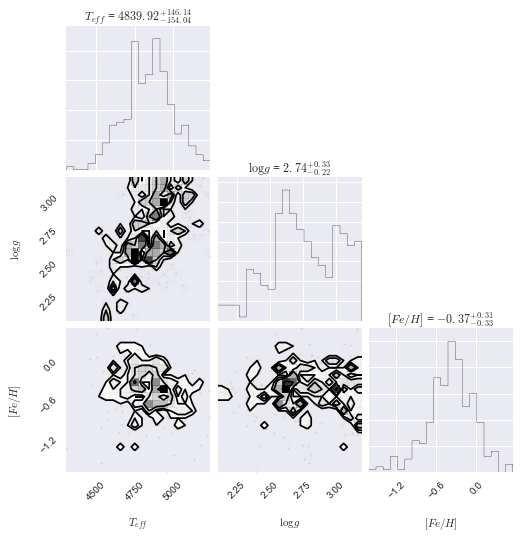

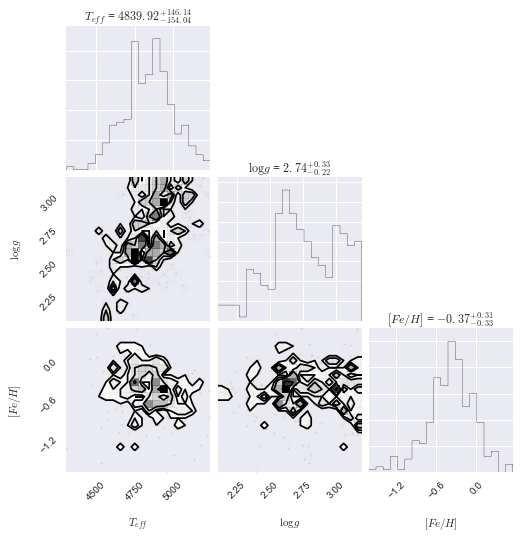

In [3]:
ds.diagnostics_ref_labels()

In [4]:
ds.ranges = [[3697,5500],[6461,8255]]

In [5]:
pseudo_tr_flux, pseudo_tr_ivar = ds.continuum_normalize_training_q(q=0.90, delta_lambda=50)

Continuum normalizing the tr set using running quantile...
##########################################################
@Bo Zhang: you will use only 1 process ...
           i.e., the original TheCannon version
##########################################################
contnorm.py: continuum norm using running quantile
Taking spectra in 2 chunks
cont_norm_q(): working on star [1/311]...
cont_norm_q(): working on star [2/311]...
cont_norm_q(): working on star [3/311]...
cont_norm_q(): working on star [4/311]...
cont_norm_q(): working on star [5/311]...
cont_norm_q(): working on star [6/311]...
cont_norm_q(): working on star [7/311]...
cont_norm_q(): working on star [8/311]...
cont_norm_q(): working on star [9/311]...
cont_norm_q(): working on star [10/311]...
cont_norm_q(): working on star [11/311]...
cont_norm_q(): working on star [12/311]...
cont_norm_q(): working on star [13/311]...
cont_norm_q(): working on star [14/311]...
cont_norm_q(): working on star [15/311]...
cont_norm_q(): wor

In [8]:
#contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)

In [ ]:
ds.set_continuum(contmask)

In [ ]:
cont = ds.fit_continuum(3, "sinusoid")

In [ ]:
norm_tr_flux, norm_tr_ivar, norm_test_flux, norm_test_ivar = ds.continuum_normalize(cont)

In [ ]:
ds.tr_flux = norm_tr_flux
ds.tr_ivar = norm_tr_ivar
ds.test_flux = norm_test_flux
ds.test_ivar = norm_test_ivar

In [ ]:
len(ds.wl)

In [ ]:
len(ds.test_flux[0])

In [ ]:
#plt.scatter(ds.wl,ds.test_flux[4])

In [ ]:
md = model.CannonModel(2)
md.fit(ds)

In [ ]:
md.diagnostics_leading_coeffs(ds)

In [ ]:
md.diagnostics_contpix(ds)

In [ ]:
label_errs = md.infer_labels(ds)

In [ ]:
test_labels = pd.DataFrame(ds.test_label_vals)

In [ ]:
plt.scatter(test_labels[0], test_labels[1])

In [ ]:
#tr_label